In [26]:
import torch
import statsmodels.api
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *

In [2]:
data = statsmodels.api.datasets.anes96.load_pandas().data

In [3]:
data.head(2)

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income,vote,logpopul
0,0.0,7.0,7.0,1.0,6.0,6.0,36.0,3.0,1.0,1.0,-2.302585
1,190.0,1.0,3.0,3.0,5.0,1.0,20.0,4.0,1.0,0.0,5.247550


In [4]:
data.nunique().T

popul       99
TVnews       8
selfLR       7
ClinLR       7
DoleLR       7
PID          7
age         71
educ         7
income      24
vote         2
logpopul    99
dtype: int64

In [5]:
data.shape

(944, 11)

In [6]:
X = data.drop(columns=['vote']).values
y = data['vote'].values.reshape(-1,1)

In [7]:
X = (X - X.mean(axis=0))/X.std(axis=0)

In [8]:
X_ = torch.tensor(X, dtype=torch.float32)
y_ = torch.tensor(y.reshape(-1, 1), dtype=torch.float32)

In [9]:
tensor_ = torch.utils.data.TensorDataset(X_, y_)
train_  = torch.utils.data.DataLoader(tensor_, batch_size=32, shuffle=True)

In [64]:
# funçoes de ativação
def sigmoid_(x):
    return 1/( 1 + torch.exp(-1*x) )

def relu_(x):
    return torch.clamp_min(x, 0)

def tanh_(x):
    return (torch.exp(x) - torch.exp(-1*x)) / (torch.exp(x) + torch.exp(-1*x))

def relu6_(x):
    return torch.clamp(x, 0, 6)


def minsh(x):
    return x * torch.tanh( torch.softmax(x, dim=0) )

Text(0.5, 1.0, 'minsh_')

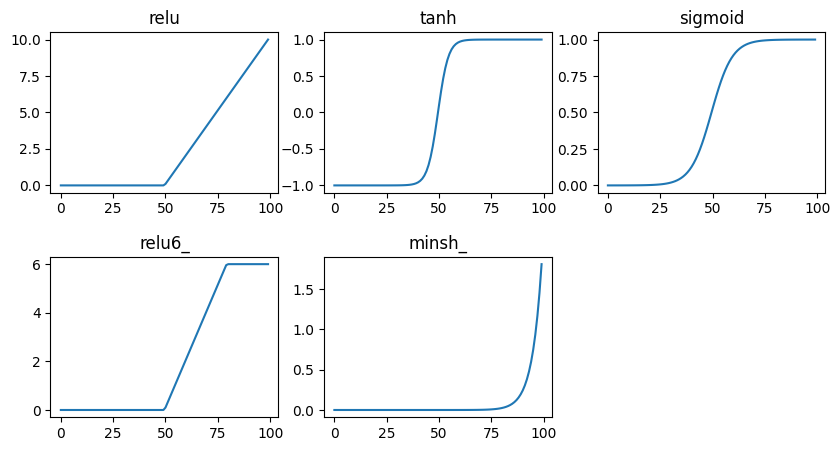

In [65]:
plt.figure(figsize=(10, 5)).subplots_adjust(hspace=0.4)


plt.subplot(2, 3, 1)
plt.plot(list( map(relu_, torch.linspace(-10, 10, 100))))
plt.title('relu')


plt.subplot(2, 3, 2)
plt.plot(tanh_(torch.linspace(-10, 10, 100)))
plt.title('tanh')


plt.subplot(2, 3, 3)
plt.plot(sigmoid_(torch.linspace(-10, 10, 100)))
plt.title('sigmoid')


plt.subplot(2, 3, 4)
plt.plot(list( map(relu6_, torch.linspace(-10, 10, 100))))
plt.title('relu6_')


plt.subplot(2, 3, 5)
plt.plot(minsh(torch.linspace(-10, 10, 100)))
plt.title('minsh_')


In [66]:
def RMSLE_loss(input_, output_):
    return (
        torch.log(input_ + 1) -
        torch.log(output_ + 1)
    ).pow(2).mean().sqrt().requires_grad_()

usando o relu6_

In [67]:
torch.manual_seed(seed=1)
weight = torch.randn(10, dtype=torch.float32)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

# definindo o modelo
def modelo(x):
    return x @ weight.reshape(-1, 1) + bias

n_epochs = 40


mean_loss_ = []
mean_acc_  = []


for epoch in range(n_epochs):
    acc_ , loss_L = [], []
    
    for enum_, (xbatch, ybatch) in enumerate(train_, 1):
        pred_ = modelo(xbatch)
        pred_ = relu6_(pred_)
        
        loss_ = RMSLE_loss(ybatch, pred_.reshape(-1, 1))
        loss_.backward()

        p_ = (pred_ >= .5).float().detach()
        acc_.append(
            accuracy_score(ybatch, p_)
        )
        loss_L.append(
            loss_.item()
        )

    with torch.no_grad():
      
        weight -= weight.grad * 0.01
        bias   -= bias.grad * 0.01

        weight.grad.zero_()
        bias.grad.zero_()
    
    if (n_epochs <= 10):
        print(f'Epoch : {loss_.item()}')

    mean_acc_.append(np.mean(acc_))
    mean_loss_.append(np.mean(loss_L))

In [68]:
with torch.no_grad():
    pred_ = ( modelo(X_) >= 0.5).float().detach()

In [69]:
confusion_matrix(y_, pred_)

array([[534,  17],
       [169, 224]], dtype=int64)

In [70]:
print(classification_report(y_, pred_))

              precision    recall  f1-score   support

         0.0       0.76      0.97      0.85       551
         1.0       0.93      0.57      0.71       393

    accuracy                           0.80       944
   macro avg       0.84      0.77      0.78       944
weighted avg       0.83      0.80      0.79       944



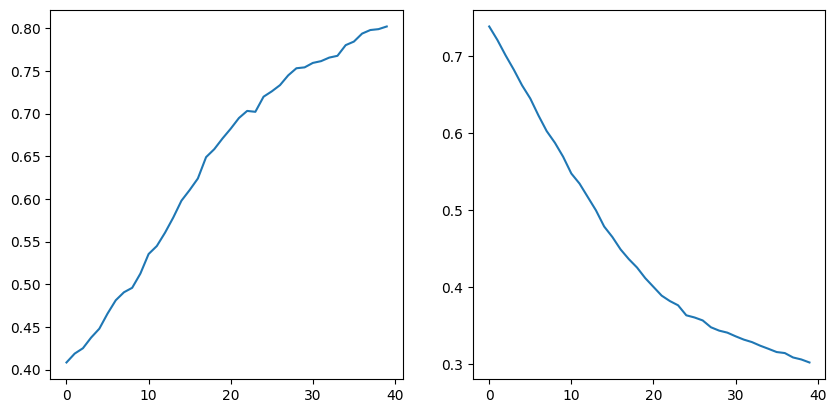

In [71]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(10)

ax[0].plot(mean_acc_)
ax[1].plot(mean_loss_)
plt.show()

relu

In [76]:
torch.manual_seed(seed=1)
weight = torch.randn(10, dtype=torch.float32)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

# definindo o modelo
def modelo(x):
    return x @ weight.reshape(-1, 1) + bias

n_epochs = 100


mean_loss_ = []
mean_acc_  = []


for epoch in range(n_epochs):
    acc_ , loss_L = [], []
    
    for enum_, (xbatch, ybatch) in enumerate(train_, 1):
        pred_ = modelo(xbatch)
        pred_ = relu_(pred_)
        
        loss_ = RMSLE_loss(ybatch, pred_.reshape(-1, 1))
        loss_.backward()

        p_ = (pred_ >= .5).float().detach()
        acc_.append(
            accuracy_score(ybatch, p_)
        )
        loss_L.append(
            loss_.item()
        )

    with torch.no_grad():
      
        weight -= weight.grad * 0.01
        bias   -= bias.grad * 0.01

        weight.grad.zero_()
        bias.grad.zero_()
    
    if (n_epochs <= 10):
        print(f'Epoch : {loss_.item()}')

    mean_acc_.append(np.mean(acc_))
    mean_loss_.append(np.mean(loss_L))

In [77]:
with torch.no_grad():
    pred_ = ( modelo(X_) >= 0.5).float().detach()

In [78]:
confusion_matrix(y_, pred_)

array([[521,  30],
       [ 55, 338]], dtype=int64)

In [79]:
print(classification_report(y_, pred_))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92       551
         1.0       0.92      0.86      0.89       393

    accuracy                           0.91       944
   macro avg       0.91      0.90      0.91       944
weighted avg       0.91      0.91      0.91       944



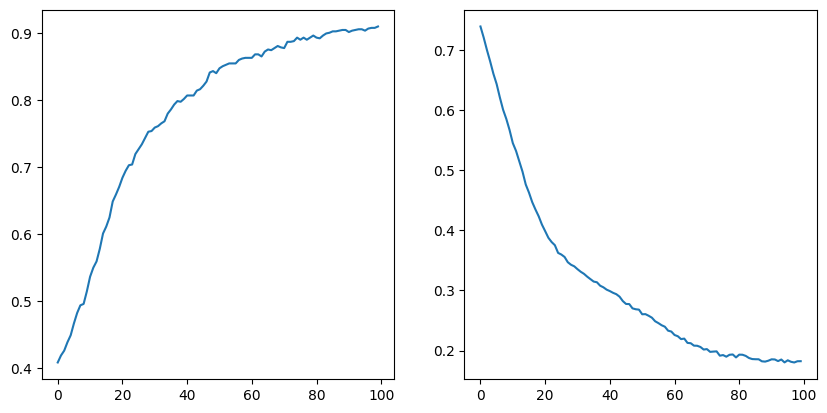

In [80]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(10)

ax[0].plot(mean_acc_)
ax[1].plot(mean_loss_)
plt.show()